<a href="https://colab.research.google.com/github/sanadv/MLCourse/blob/main/Lesson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w0 =  0.20 , w1 = -0.60 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


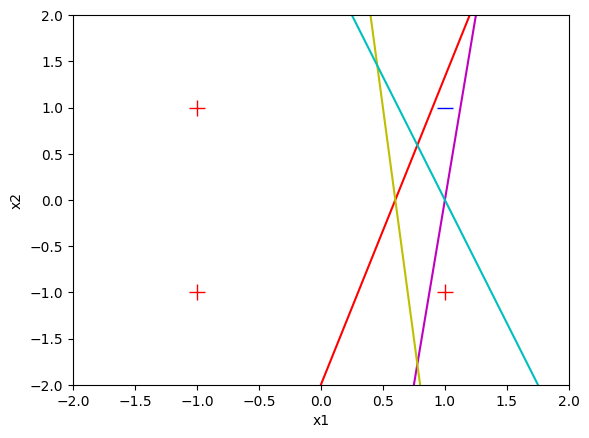

In [11]:
# 6.1 Perceptron

import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

import numpy as np
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i]  # Compute sum of weighted inputs
    if z < 0:  # Apply sign function
        return -1
    else:
        return 1

random.seed(7)  # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3]  # Used to randomize order
def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
    ', w2 =', '%5.2f' % w[2])

# Define variables needed for plotting.
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0
def show_learningplot(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
    ', w2 =', '%5.2f' % w[2])
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0],
        'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)),
        -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
        -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) - 1):
       color_index += 1

x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
           (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
y_train = [1.0, 1.0, 1.0, -1.0]

w = [0.2, -0.6, 0.25]  # Initialize to some "random" numbers
show_learning(w)
# Running the training loop again to adjust the weights
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list)  # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x)  # Perceptron function
        if y != p_out:  # Update weights when wrong
            for j in range(len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learningplot(w)



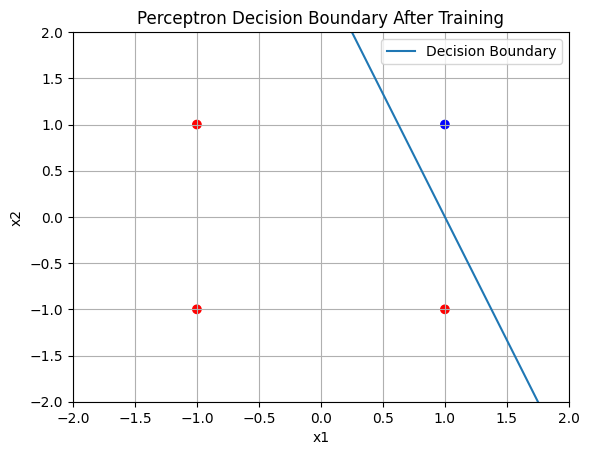

(None, [0.4, -0.4, -0.15000000000000002])

In [12]:
# After Training
# Plotting the decision boundary after training
x1 = np.linspace(-2, 2, 100)
x2 = -(w[1]/w[2])*x1 - (w[0]/w[2])

plt.scatter([x[1] for x in x_train], [x[2] for x in x_train], c=y_train, cmap='bwr')

plt.plot(x1, x2, label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary After Training')
plt.legend()
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show(), w



Function: compute_output(w, x)
- Purpose: Computes the output of the Perceptron given a set of weights and inputs.
- Parameters:
  - `w`: A list of weights where `w[i]` corresponds to the weight for the `i`th input.
  - `x`: A list of inputs where `x[i]` is the `i`th input value.
- Process: It calculates the dot product of the weights and inputs and applies a sign function to determine the output. If the dot product is negative, it returns `-1`, otherwise, it returns `1`.
- Returns: The binary classification result (`-1` or `1`) based on the sign of the weighted sum.

Global Setup
- `random.seed(7)`: Ensures repeatability of the script by initializing the random number generator with a fixed seed.
- `LEARNING_RATE = 0.1`: Sets the learning rate, which controls how much the weights are adjusted during each iteration.
- `index_list = [0, 1, 2, 3]`: A list used to randomize the order in which training examples are presented to the model.

Function: show_learning(w)
- Purpose: Prints the current weights of the Perceptron model.
- Parameters:
  - `w`: The current set of weights.
- Process: Formats and prints the weights to the console, providing insight into how the model is learning.

Training Data
- `x_train`: A list of tuples representing the input vectors. The first element of each tuple is always `1.0` to account for the bias term in linear models.
- `y_train`: A list of expected output values (`1.0` or `-1.0`) corresponding to each input vector in `x_train`.

Training Loop
- Initializes the weights `w` to some random values.
- Enters a loop that continues until the model correctly classifies all training examples.
- Randomly shuffles the order of training examples to introduce variability in the training process.
- For each training example, it computes the output and compares it to the expected output. If they don't match, it adjusts the weights according to the Perceptron learning rule.

Weight Adjustment
- Rule: `w[j] += (y * LEARNING_RATE * x[j])`
- Explanation: For each weight, it is adjusted by adding the product of the learning rate, the error (`y - output`), and the corresponding input value. This rule gradually nudges the weights in the direction that reduces the classification error.

Plotting the Decision Boundary
- After training, calculates a line that represents the decision boundary of the model.
- The decision boundary is determined by the equation `w[0] + w[1]*x1 + w[2]*x2 = 0`.
- Visualizes the training data and the decision boundary on a scatter plot, showing how well the model has learned to separate the two classes.

Key Concepts Illustrated
- Perceptron Model: Demonstrates the basic principles of neural networks, including weight adjustment based on learning from errors.
- Linear Separability: The model's ability to classify examples is based on the premise that the data is linearly separable.
- Learning Process: Through iterative adjustments, the model learns a decision boundary that best separates the two classes.

This script effectively demonstrates the fundamental mechanism behind the training of neural networks, particularly in the context of binary classification with linear models.

Epoch 0, Loss: 0.9125
Epoch 100, Loss: 0.2616520146262905
Epoch 200, Loss: 0.2502049350110963
Epoch 300, Loss: 0.25000360438603286
Epoch 400, Loss: 0.2500000633937491
Epoch 500, Loss: 0.2500000011149659
Epoch 600, Loss: 0.25000000001961
Epoch 700, Loss: 0.2500000000003449
Epoch 800, Loss: 0.250000000000006
Epoch 900, Loss: 0.2500000000000001


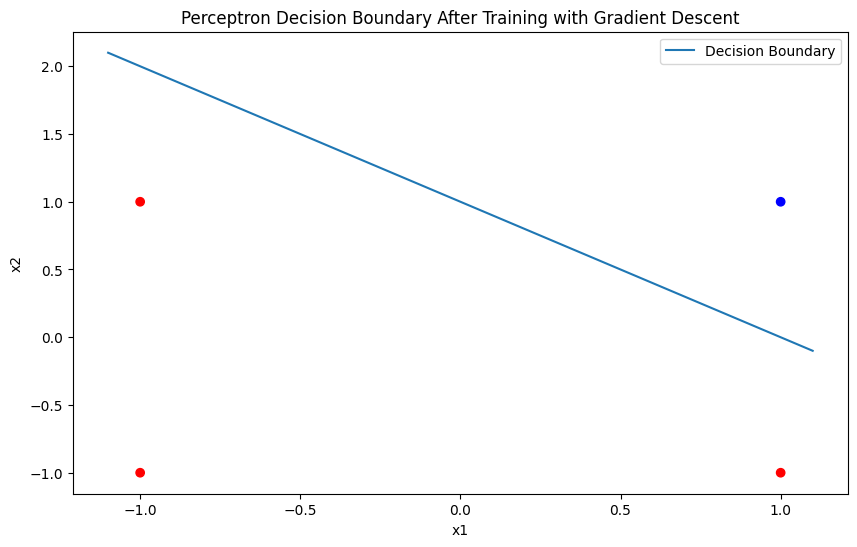

(array([ 0.5, -0.5, -0.5]), 0.25)

In [15]:
# 6.2 Gradient Descent
import random
import matplotlib.pyplot as plt
import numpy as np

def compute_output(w, x):
    # x is expected to be a 2D array where each row is an input vector
    z = np.dot(x, w)  # Use x as is, without transposing
    return z

def compute_gradient(w, x, y):
    # Correct gradient calculation for batch processing
    y_pred = compute_output(w, x)
    errors = y - y_pred
    # Compute gradient as the average of the individual gradients
    gradient = -2 * np.dot(x.T, errors) / len(x)  # Adjusted to correct gradient formula
    return gradient

def compute_loss(y_true, y_pred):
    # Mean Squared Error loss
    return np.mean((y_true - y_pred) ** 2)

# Seed for reproducibility
random.seed(7)

# Hyperparameters
LEARNING_RATE = 0.01
EPOCHS = 1000

# Training data
x_train = np.array([
    (1.0, -1.0, -1.0),
    (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0),
    (1.0, 1.0, 1.0)
])
y_train = np.array([1.0, 1.0, 1.0, -1.0])

# Initialize weights
w = np.array([0.2, -0.6, 0.25])

losses = []  # To track the loss at each epoch

for epoch in range(EPOCHS):
    # Compute the model's output
    y_pred = compute_output(w, x_train)  # Corrected

    # Compute the loss
    loss = compute_loss(y_train, y_pred)
    losses.append(loss)

    # Compute gradients
    gradient = compute_gradient(w, x_train, y_train)

    # Update weights
    w -= LEARNING_RATE * gradient

    # Optional: Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting decision boundary after training
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:,1], x_train[:,2], c=y_train, cmap='bwr')
x_values = np.array(plt.gca().get_xlim())
y_values = -(w[0] + w[1]*x_values)/w[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary After Training with Gradient Descent')
plt.legend()
plt.show()

# Return the final weights and last loss for reference
w, losses[-1]
